In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score

**Let's look at a new dataset.**

In [4]:
wine = load_wine()

**Let's take a look at the description of the dataset**

In [5]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

**Let's print out the feature names**

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

**Let's take a look at the target column**

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

We can access the data using the following attribute

In [8]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

**Let's put the data into a new variable**

In [10]:
D_wine = wine.data

**Let's put the target into a new variable**

In [11]:
target = wine.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Let's do AgglomerativeClustering on the dataset**

In [12]:
ac = AgglomerativeClustering (n_clusters= 6, metric= 'euclidean', linkage= 'single')

# #linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
# Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
# ‘ward’ minimizes the variance of the clusters being merged.
# ‘average’ uses the average of the distances of each observation of the two sets.
# ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
# ‘single’ uses the minimum of the distances between all observations of the two sets.

**Let's run the algorithm**

In [13]:
ac.fit(D_wine)

AgglomerativeClustering(linkage='single', n_clusters=6)

**Now we can look at the cluster labels.**

In [14]:
ac.labels_

array([0, 0, 0, 5, 2, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 3, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 5, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Now let us look at the contingency table**

In [15]:
contingency_matrix(ac.labels_, target)

array([[39,  1,  0],
       [ 0,  1,  0],
       [13, 69, 48],
       [ 1,  0,  0],
       [ 1,  0,  0],
       [ 5,  0,  0]])

**Now we can move on to evaluating clustering result**

**Let's look at silhouette coefficient first**

**Remember silhouette coefficient is an internal evaluating measure. it does not need the ground truth**

In [16]:
silhouette_score(D_wine, ac.labels_)

np.float64(0.28405280556794804)

**Now let's look at the F1-score**

**This is a external evaluating measure, therefore we need the ground truth. We pass the target column as the ground truth**

In [19]:
print(f1_score(target, ac.labels_, average= None))
f1_score(target, ac.labels_, average= 'weighted')

[0.78787879 0.02777778 0.53932584 0.         0.         0.        ]


0.4176669166096006

**However, there is a problem with this method, this method is label sensitive.**

**This does not output the f-score we talked about in the class. In fact this implementation is for evaluating classification results**

**Let's use a different method in sklearn library for this**
        

In [20]:
from sklearn.metrics.cluster import v_measure_score

print(v_measure_score(target, ac.labels_))

0.4104881496332688


In [23]:
f1_score([0,0,0,1,1,1], [2,2,2,5,5,5], average= None)
print(v_measure_score([0,0,0,1,1,1], [2,2,2,5,5,5]))

1.0


**Let's try to input different number of clusters to the input**

In [25]:
ac = AgglomerativeClustering (n_clusters= 3, metric= 'euclidean', linkage= 'single')

In [26]:
ac.fit(D_wine)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [27]:
ac.labels_

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [28]:
contingency_matrix(ac.labels_, target)

array([[53, 71, 48],
       [ 1,  0,  0],
       [ 5,  0,  0]])

In [29]:
silhouette_score(D_wine, ac.labels_)

np.float64(0.48798203351890634)

In [30]:
# f1_score(target, ac.labels_, average= 'weighted')

In [32]:
print(v_measure_score(target, ac.labels_))

0.06154328206557934


**Let's try a different linkage parameter**

In [33]:
ac = AgglomerativeClustering (n_clusters= 3, metric= 'euclidean', linkage= 'complete')

In [34]:
ac.fit(D_wine)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [35]:
ac.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1])

In [36]:
contingency_matrix(ac.labels_, target)

array([[43,  0,  0],
       [ 0, 56, 27],
       [16, 15, 21]])

In [37]:
silhouette_score(D_wine, ac.labels_)

np.float64(0.5418973703348594)

In [38]:
# f1_score(target, ac.labels_, average= 'weighted')

In [39]:
print(v_measure_score(target, ac.labels_))

0.44227466849796154


**This seems to be better**

**We can try some other linkage parameter as well**

In [40]:
ac = AgglomerativeClustering (n_clusters= 3, metric= 'euclidean', linkage= 'ward') #‘ward’ minimizes the variance of the clusters being merged.

In [41]:
ac.fit(D_wine)

AgglomerativeClustering(n_clusters=3)

In [42]:
ac.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [43]:
contingency_matrix(ac.labels_, target)

array([[46,  2,  0],
       [ 0, 51, 21],
       [13, 18, 27]])

In [44]:
silhouette_score(D_wine, ac.labels_)

np.float64(0.5644796401732068)

In [45]:
# f1_score(target, ac.labels_, average= 'weighted')

In [46]:
print(v_measure_score(target, ac.labels_))

0.41607665398992943


**Let's try some evaluating synthetic datasets.**

Text(0, 0.5, 'X2')

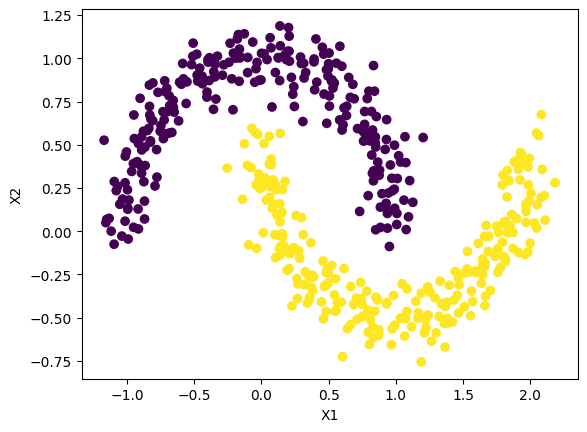

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
X, cluster_labels = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0],X[:,1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')

In [48]:
# silhouette_score(X, cluster_labels)
# f1_score(cluster_labels, cluster_labels, average= None)

Now let's try to evaluate k-means clustering on this.

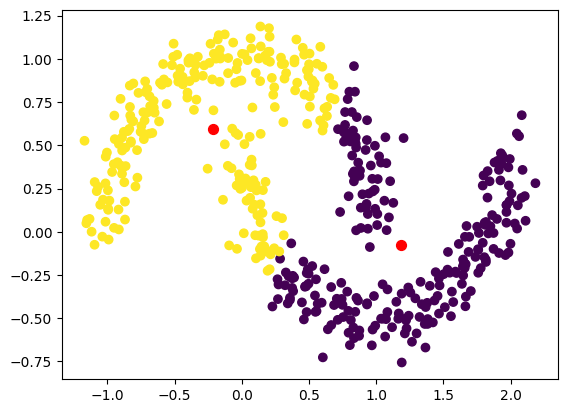

In [49]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
plt.scatter(X[:,0], X[:,1], c=kmeans.fit_predict(X))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

**Silhouette coefficient**

In [50]:
silhouette_score(X, kmeans.labels_)

np.float64(0.4833313621809169)

**F-score**

In [51]:
# f1_score(cluster_labels, kmeans.labels_, average= 'weighted')

In [53]:
print(v_measure_score(cluster_labels, kmeans.labels_))

0.19845485759773868


**Let's run DBSCAN on this**

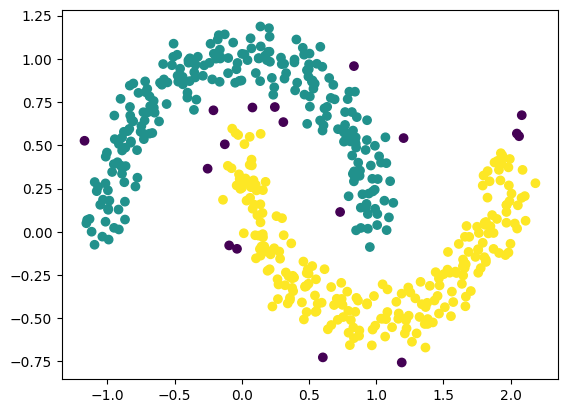

In [54]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.14, min_samples=8).fit(X)
plt.scatter(X[:,0], X[:,1], c=db.labels_)

In [55]:
silhouette_score(X, db.labels_)

np.float64(0.20357313557771345)

**silhouette_score does not seem like a good way to evaluate dbscan clustering**

In [56]:
# print(f1_score(cluster_labels, db.labels_, average= 'weighted'))
contingency_matrix(db.labels_, cluster_labels)
print(v_measure_score(cluster_labels, db.labels_))

0.8862887556348704


F-score seems like a good way to evaluate DBSCAN clustering given the ground truth


**Let's run agglomertive clustering algorithm**

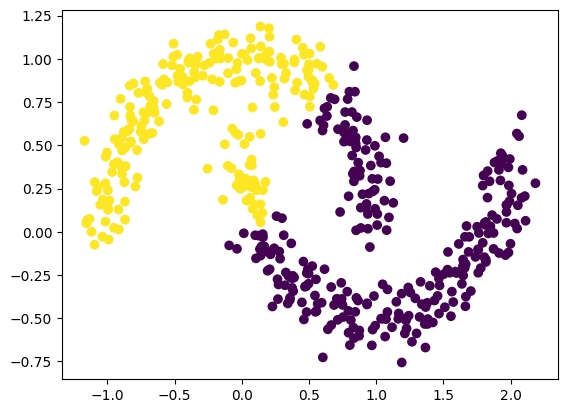

In [57]:
ac = AgglomerativeClustering (n_clusters= 2, metric= 'euclidean', linkage= 'average') # try different linkage values ward, complete, average...
ac.fit(X)
plt.scatter(X[:,0], X[:,1], c=ac.labels_)

In [58]:
silhouette_score(X, ac.labels_)

np.float64(0.4772404668567815)

In [59]:
# print(f1_score(cluster_labels, ac.labels_, average= 'weighted'))
contingency_matrix(ac.labels_, cluster_labels)
print(v_measure_score(cluster_labels, ac.labels_))

0.2565438574859124


Look like hierarchical clustering output is somewhat good for this synthetic dataset.

**The Silhouette Coefficient relies on the assumption that clusters are convex and isotropic (spherical or evenly dense)**

**Density-based algorithms explicitly identify noise points (outliers). The Silhouette Coefficient can assign arbitrary, and often poor, silhouette scores to these noise points, which can skew the overall evaluation.**

**The silhouette coefficient expects clusters to have similar densities. Density-based methods can accurately identify clusters with widely varying densities, which can lead to poor silhouette scores, even when the clustering is meaningful.**

**Let's try another synthetic dataset**

Text(0, 0.5, 'X2')

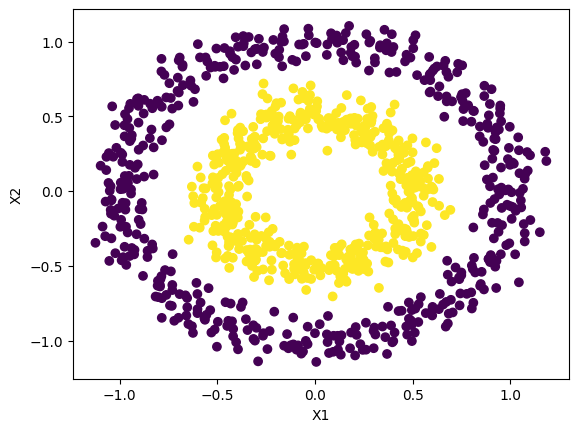

In [60]:
from sklearn.datasets import make_circles
circles, circle_cluster_labels = make_circles(n_samples=1000,noise = 0.08, factor=0.5) # Make a large circle containing a smaller circle in 2d.
plt.scatter(circles[:,0],circles[:,1], c=circle_cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')

**Let's run K-means, DBSCAN and agglomerative clustering on this dataset.**

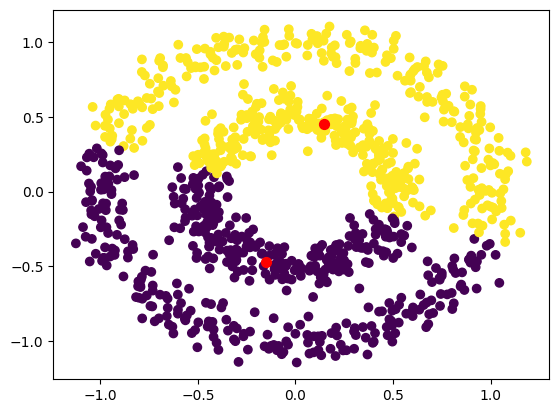

In [61]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=350)
kmeans = kmeans.fit(circles)
plt.scatter(circles[:,0], circles[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')

In [62]:
print(silhouette_score(circles, kmeans.fit_predict(circles)))
# print(f1_score(circle_cluster_labels, kmeans.labels_, average= 'weighted'))
# print(f1_score(circle_cluster_labels, kmeans.labels_, average= None))
print(v_measure_score(circle_cluster_labels, kmeans.labels_))

0.34954208606037546
2.885407708148147e-06


**Let's run dbscan on this dataset**

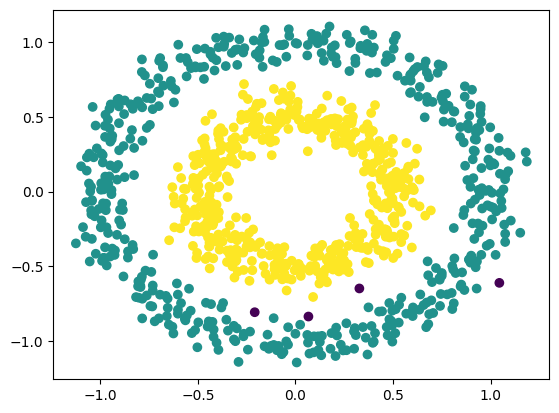

In [63]:
db_circle = DBSCAN(eps=0.12, min_samples=7).fit(circles) # tried different eps values and chose the best one here
plt.scatter(circles[:,0], circles[:,1], c=db_circle.labels_)

In [64]:
print(silhouette_score(circles, db_circle.labels_))
# print(f1_score(circle_cluster_labels, db_circle.labels_, average='weighted'))
# print(f1_score(circle_cluster_labels, db_circle.labels_, average=None))
circle_cluster_labels
db_circle.labels_
print(contingency_matrix(db_circle.labels_, circle_cluster_labels))
print(v_measure_score(circle_cluster_labels, db_circle.labels_))

-0.030468953115595138
[[  3   1]
 [497   0]
 [  0 499]]
0.980276699224696


**Silhouette coefficient gives tells us that this clustering result is bad, on the other hand F-Score tells us that clustering result is good**

**Example where I removed the noise points from the predicted labels**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
# from sklearn.metrics import f1_score, contingency_matrix

# Generate moon dataset
X, cluster_labels = make_moons(n_samples=500, noise=0.1)

# Plot the ground truth
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Ground Truth - Moons Dataset")
plt.show()

# Run DBSCAN
dbscan = DBSCAN(eps=0.14, min_samples=8) # Adjust eps and min_samples as needed.
dbscan_labels = dbscan.fit_predict(X)

# Plot DBSCAN results
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("DBSCAN Clustering - Moons Dataset")
plt.show()

# Contingency Matrix
conf_matrix = contingency_matrix(cluster_labels, dbscan_labels)
print("Contingency Matrix:\n", conf_matrix)

# Calculate F1-score (ignoring noise)
noise_mask_predicted = dbscan_labels != -1
noise_mask_ground_truth = cluster_labels != -1
noise_mask = noise_mask_predicted & noise_mask_ground_truth

filtered_predicted = dbscan_labels[noise_mask]
filtered_ground_truth = cluster_labels[noise_mask]

f1_no_noise = f1_score(filtered_ground_truth, filtered_predicted, average=None)
print("F1-score (ignoring noise):", f1_no_noise)

# Calculate F1-score (including noise)
f1_with_noise = f1_score(cluster_labels, dbscan_labels, average=None)
print("F1-score (including noise):", f1_with_noise)

print(v_measure_score(cluster_labels, dbscan_labels))

**One more example**

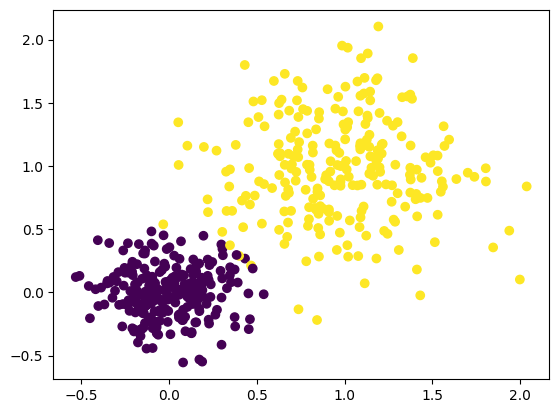

In [66]:
from sklearn.datasets import make_blobs
blob_data, blob_labels = make_blobs(n_samples = 500, centers=[[0,0], [1,1]], cluster_std=[0.2, 0.4], random_state=0)
plt.scatter(blob_data[:,0], blob_data[:,1], c=blob_labels)
ac_blob = AgglomerativeClustering (n_clusters= 2, metric= 'euclidean', linkage= 'complete')
# ac_blob.fit(blob_data)
ac_blob = ac_blob.fit(blob_data)

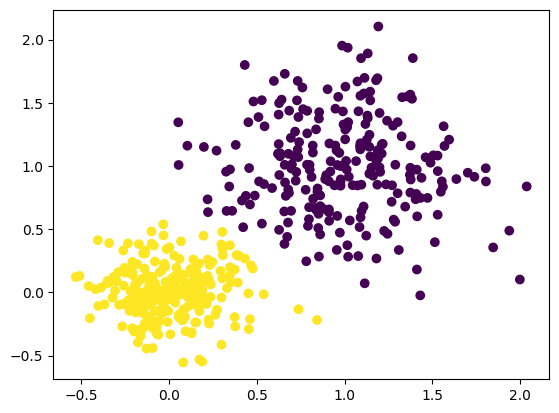

In [67]:
plt.scatter(blob_data[:,0], blob_data[:,1], c=ac_blob.labels_)

In [68]:
print(silhouette_score(blob_data, ac_blob.labels_))
# print(f1_score(blob_labels, ac_blob.labels_, average='binary'))
print(contingency_matrix(blob_labels, ac_blob.labels_))
print(v_measure_score(blob_labels, ac_blob.labels_))

0.6308402155405759
[[  0 250]
 [243   7]]
0.9075607558443622


**Some examples of why sklearns F-score is different from what we learnt in the class**

In [ ]:
print(f1_score([0,0,0,1,1,1], [2,2,2,3,3,3], average='weighted'))

**If you want to calculate the precision and recall we learnt in the class, we can use following functions**

In [70]:
from sklearn import metrics
print(metrics.homogeneity_score([0,0,0,1,1,1], [2,2,2,3,3,3]))
print(metrics.completeness_score([0,0,0,1,1,1], [2,2,2,3,3,3]))
print(metrics.homogeneity_score([0, 0, 0, 1, 1, 1], [0, 0, 1, 1, 2, 2]))
print(metrics.completeness_score([0, 0, 0, 1, 1, 1], [0, 0, 1, 1, 2, 2]))

print(metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.0
1.0
0.6666666666666669
0.420619835714305
0.9999999999999999
0.49999999999999994
